## **Imports**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import xgboost


In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
# let's explore catogerical features.
print(df['Partner'].unique())
print(df['Dependents'].unique())
print(df['PhoneService'].unique())
print(df['MultipleLines'].unique())
print(df['InternetService'].unique())
print(df['OnlineSecurity'].unique())
print(df['OnlineBackup'].unique())
print(df['DeviceProtection'].unique())
print(df['TechSupport'].unique())
print(df['StreamingTV'].unique())
print(df['StreamingMovies'].unique())
print(df['Contract'].unique())
print(df['PaperlessBilling'].unique())
print(df['PaymentMethod'].unique())

['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [9]:
# here TotalCharges is object type.
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [10]:
#Dropping values where value is not present and changing type to int.
df2=df[~(df['TotalCharges']==" ")]
df2['TotalCharges']=pd.to_numeric(df2.TotalCharges)


C:\Users\91955\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
df2.shape

(7032, 21)

In [12]:
df2['TotalCharges'].unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [13]:
#checking count of Churn values
df2['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [14]:
#Calculating percentage of customer churn
cust_notchurn = df2[df2['Churn']=='No'].shape[0]
cust_churn = df2[df2['Churn']=='Yes'].shape[0]

# percentage of customer not churn
print(cust_notchurn / (cust_notchurn + cust_churn) *100)

# percentage of customer churn
print(cust_churn / (cust_notchurn + cust_churn) *100)

73.42150170648463
26.578498293515356


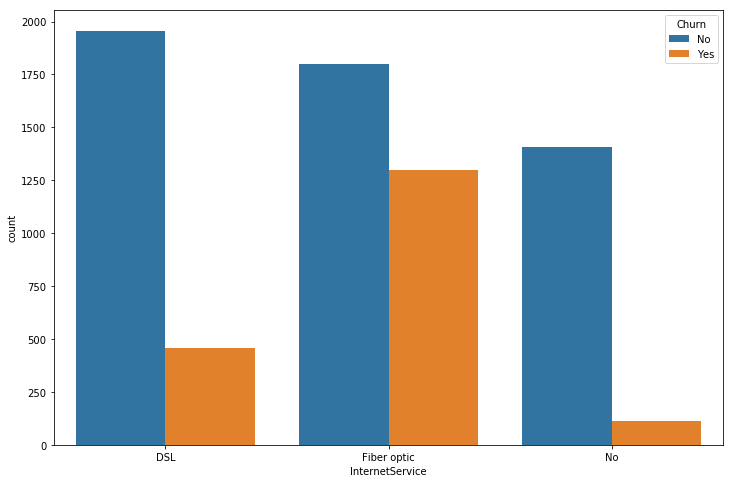

In [15]:
# counting InternetService.  poeple having Fiber optic as Internet service are leaving services is more. 
plt.figure(figsize=(12,8))
sns.countplot(x='InternetService',hue='Churn',data=df2)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002334599E390>,
      dtype=object)

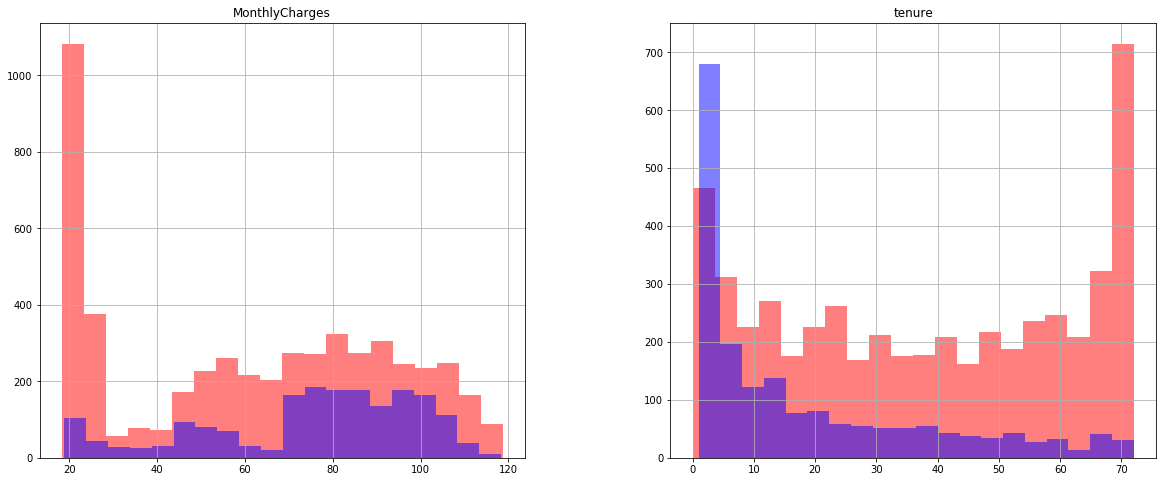

In [16]:
numeric_data = ['MonthlyCharges','tenure']
fig ,ax =plt.subplots(1,2,figsize=(20,8))

df[df['Churn']=='No'][numeric_data].hist(bins=20,color='red',alpha=0.5,ax=ax)
df[df['Churn']=='Yes'][numeric_data].hist(bins=20,color='blue',alpha=0.5,ax=ax)

# People having tenure 0 to 15 are leaving service is more.
# whereas people having Monthlycharges less are not leaving services.

In [17]:
#dropping customer Id column
df2.drop('customerID',axis=1,inplace=True)

C:\Users\91955\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [18]:
# converting catogerical Features using OneHotEncoder
df3 = df2.drop('Churn',axis=True)
df4 = pd.get_dummies(df3, drop_first=True)

In [19]:
df4['Churn']=df2['Churn']

In [20]:
# Replacing No with 0 and yes with 1 ,because we can't do OneHotEncoder to 'Churn' column.
df4.replace({'No':0,'Yes':1},inplace=True)

In [21]:
df4.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [22]:
df4.shape

(7032, 31)

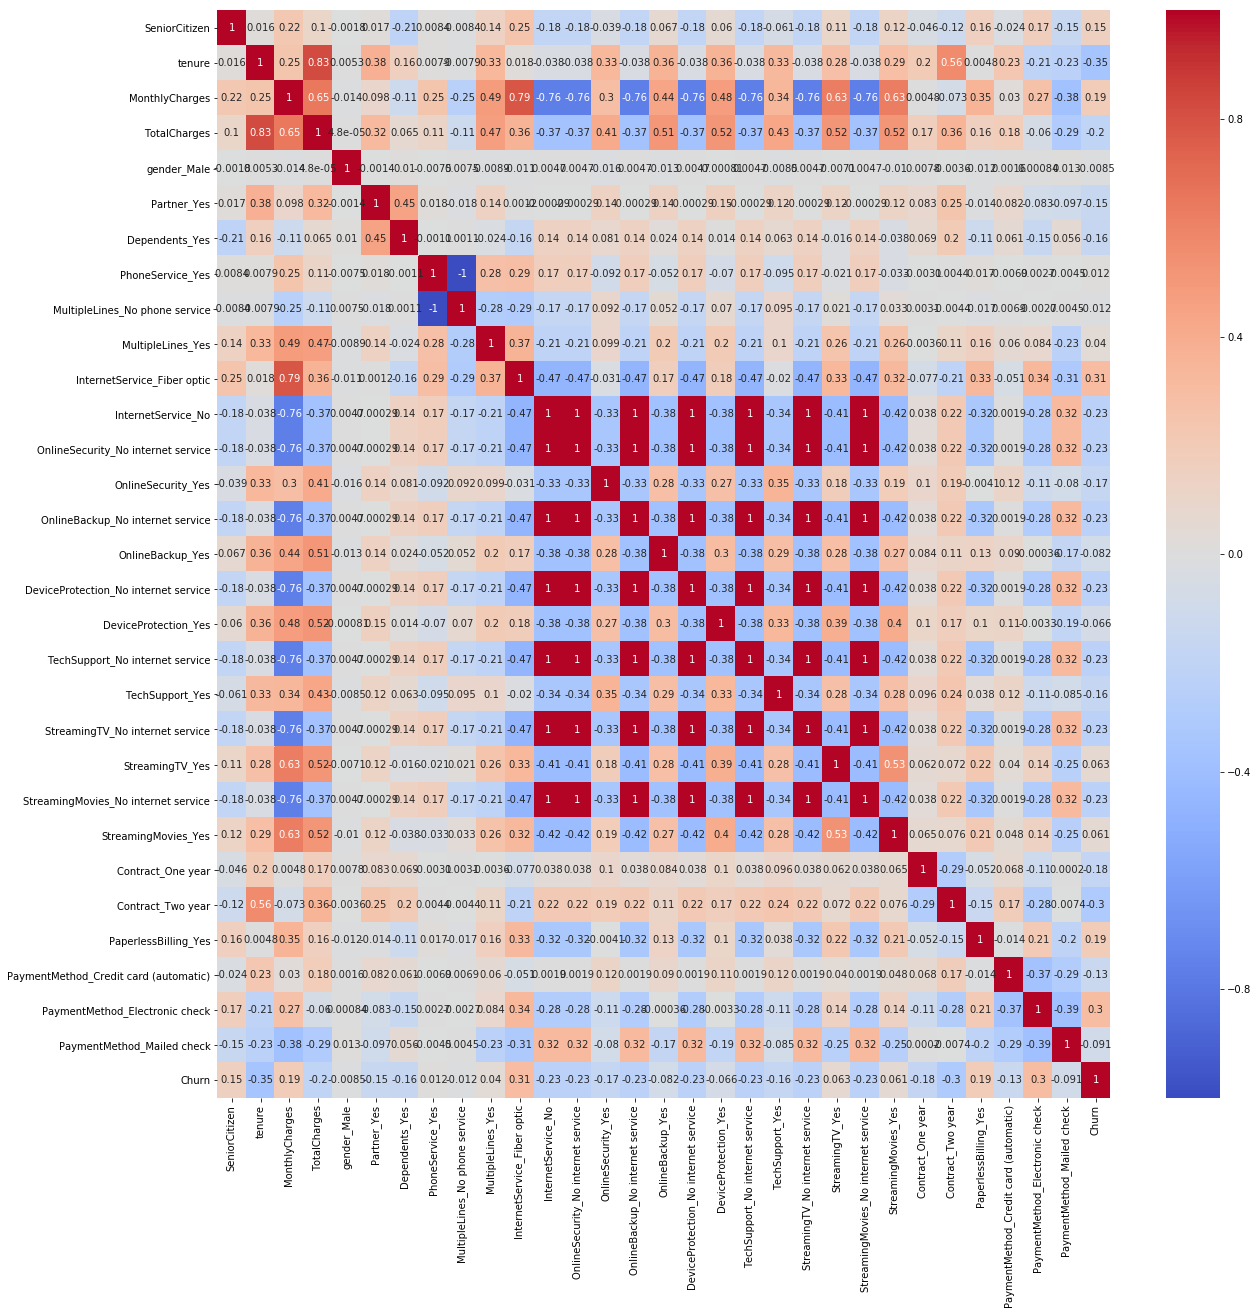

In [23]:
#Checking correlation.
plt.figure(figsize=(20,20))
sns.heatmap(df4.corr(),annot=True,cmap='coolwarm')

In [24]:
#Dropping columns which are highly related to Independent feature and less related to dependent feature.
final_dataset= df4.drop(['PaperlessBilling_Yes','MultipleLines_Yes','MultipleLines_No phone service','OnlineBackup_No internet service','OnlineBackup_Yes',
                         'StreamingTV_No internet service','StreamingTV_Yes','TotalCharges'],axis=1)

In [25]:
final_dataset.shape

(7032, 23)

In [26]:
# x = Independent Features.
x =final_dataset.drop('Churn',axis=1)

In [27]:
# y = Dependent Feature.
y = final_dataset['Churn']

In [28]:
x.head()

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,34,56.95,1,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1
2,0,2,53.85,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,45,42.30,1,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
4,0,2,70.70,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [30]:
model = xgboost.XGBClassifier()

In [31]:
# Hyper parameter tunning.
param = {
    'learning_rate'     :[0.05, 0.10, 0.15, 0.20, 0.25],
    'max_depth'         :[3, 4, 5, 6, 8, 10, 13],
    'min_child_weight'  :[1, 3, 5, 7],
    'gamma'             :[0.0, 0.1, 0.2, 0.3, 0.4],
    'colsample_bytree'  :[0.3, 0.4, 0.5, 0.7],
    'n_estimators'      :[100, 200, 300]
    }

In [32]:
from sklearn.model_selection import RandomizedSearchCV

In [33]:
random_search = RandomizedSearchCV(model, param_distributions=param, n_iter=5, scoring='roc_auc', cv=5, verbose=3)

In [34]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] n_estimators=100, min_child_weight=5, max_depth=8, learning_rate=0.1, gamma=0.2, colsample_bytree=0.7 
[CV]  n_estimators=100, min_child_weight=5, max_depth=8, learning_rate=0.1, gamma=0.2, colsample_bytree=0.7, score=0.8225164581613429, total=   0.4s
[CV] n_estimators=100, min_child_weight=5, max_depth=8, learning_rate=0.1, gamma=0.2, colsample_bytree=0.7 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  n_estimators=100, min_child_weight=5, max_depth=8, learning_rate=0.1, gamma=0.2, colsample_bytree=0.7, score=0.841700006350416, total=   0.4s
[CV] n_estimators=100, min_child_weight=5, max_depth=8, learning_rate=0.1, gamma=0.2, colsample_bytree=0.7 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


[CV]  n_estimators=100, min_child_weight=5, max_depth=8, learning_rate=0.1, gamma=0.2, colsample_bytree=0.7, score=0.8275782578973306, total=   0.4s
[CV] n_estimators=100, min_child_weight=5, max_depth=8, learning_rate=0.1, gamma=0.2, colsample_bytree=0.7 
[CV]  n_estimators=100, min_child_weight=5, max_depth=8, learning_rate=0.1, gamma=0.2, colsample_bytree=0.7, score=0.8402675103204507, total=   0.4s
[CV] n_estimators=100, min_child_weight=5, max_depth=8, learning_rate=0.1, gamma=0.2, colsample_bytree=0.7 
[CV]  n_estimators=100, min_child_weight=5, max_depth=8, learning_rate=0.1, gamma=0.2, colsample_bytree=0.7, score=0.8281426368420216, total=   0.4s
[CV] n_estimators=100, min_child_weight=3, max_depth=3, learning_rate=0.1, gamma=0.1, colsample_bytree=0.4 
[CV]  n_estimators=100, min_child_weight=3, max_depth=3, learning_rate=0.1, gamma=0.1, colsample_bytree=0.4, score=0.8290309265256874, total=   0.1s
[CV] n_estimators=100, min_child_weight=3, max_depth=3, learning_rate=0.1, gamma

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   23.7s finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None, gamma=None,
       gpu_id=None, importance_type='gain', interaction_constraints=None,
       learning_rate=None, max_delta_step=None, max_depth=None,
       min_child_w..._pos_weight=None, subsample=None,
       tree_method=None, validate_parameters=None, verbosity=None),
          fit_params=None, iid=True, n_iter=5, n_jobs=1,
          param_distributions={'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25], 'max_depth': [3, 4, 5, 6, 8, 10, 13], 'min_child_weight': [1, 3, 5, 7], 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4], 'colsample_bytree': [0.3, 0.4, 0.5, 0.7], 'n_estimators': [100, 200, 300]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=3)

In [35]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4, gamma=0.1, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=3, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [36]:
random_search.best_params_

{'n_estimators': 100,
 'min_child_weight': 3,
 'max_depth': 3,
 'learning_rate': 0.1,
 'gamma': 0.1,
 'colsample_bytree': 0.4}

In [37]:
random_search.score(x_test,y_test)

0.8478663767397906

In [38]:
model = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.3,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [39]:
model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.5, gamma=0.3, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.05, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, monotone_constraints='()',
       n_estimators=100, n_jobs=1, nthread=1, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=0, silent=None, subsample=1,
       tree_method='exact', validate_parameters=1, verbosity=1)

In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model, x_train, y_train, cv=10)

In [41]:
score

array([0.79513185, 0.77687627, 0.79513185, 0.80933063, 0.78904665,
       0.80487805, 0.81504065, 0.80040733, 0.80448065, 0.77800407])

In [43]:
score.mean()

0.7968327997592779

In [44]:
import pickle
# open a file, where you want to store the data
file = open('xgboost_model.pkl','wb')

# dump information to that file
pickle.dump(model,file)